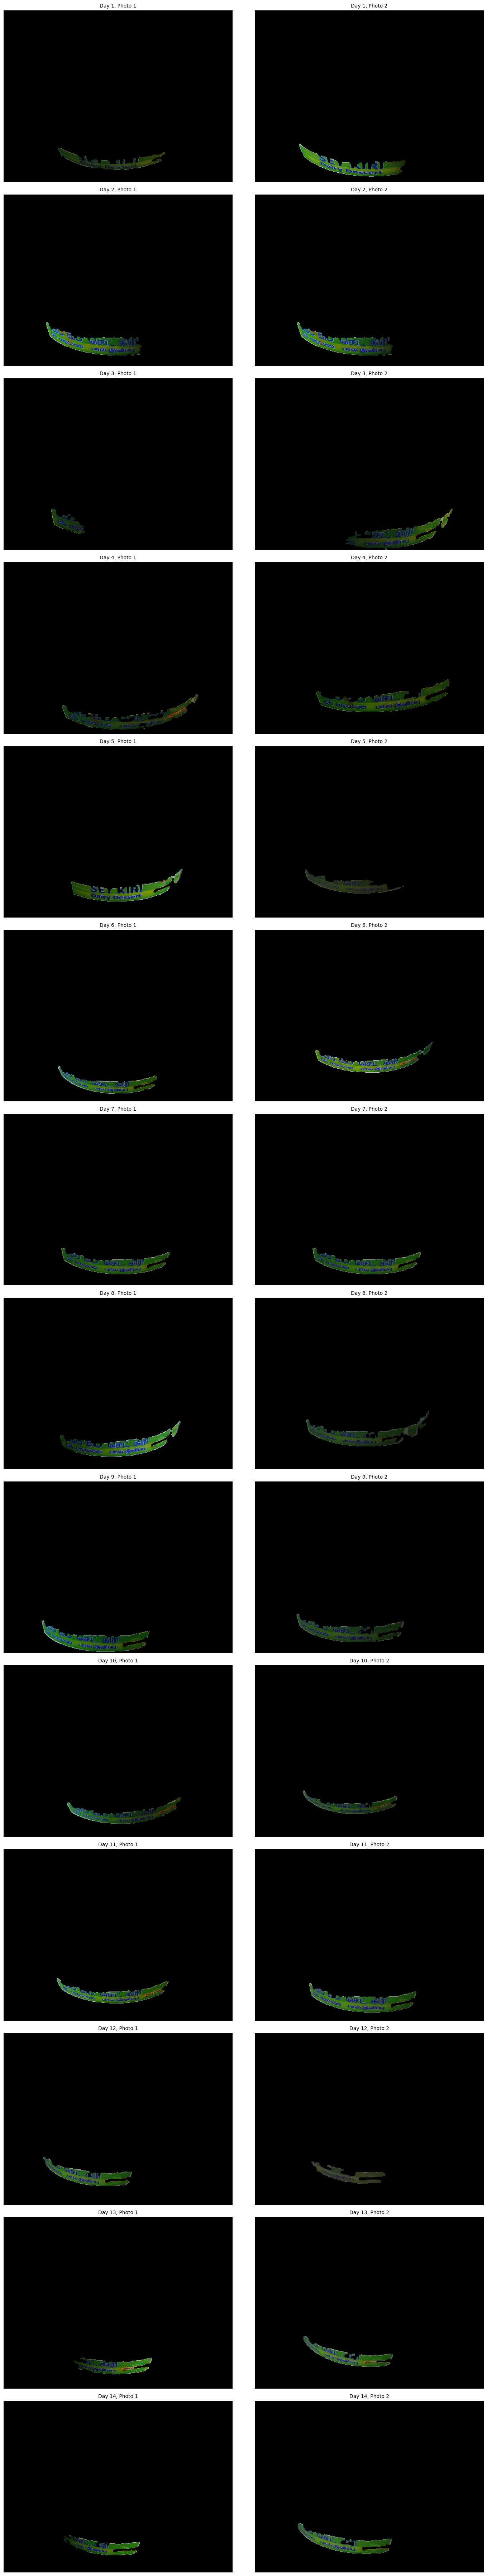

In [1]:

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def segment_image(img_path):
    image = cv2.imread(img_path)
    if image is None:
        return None

    image = cv2.resize(image, (400, 300))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower = np.array([35, 40, 40])
    upper = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)

    blurred = cv2.GaussianBlur(mask, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)

    dilate_kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(edges, dilate_kernel, iterations=1)
    cleaned = cv2.erode(dilated, dilate_kernel, iterations=1)

    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None

    largest_contour = max(contours, key=cv2.contourArea)
    contour_mask = np.zeros_like(mask)
    cv2.drawContours(contour_mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    plant = cv2.bitwise_and(image, image, mask=contour_mask)
    return plant

days = 14
photos_per_day = 2
base_dir = "C:/Users/DELL/Desktop/IP Project"

fig, axs = plt.subplots(days, photos_per_day, figsize=(15, 72))

for day in range(1, days + 1):
    for photo_num in range(1, photos_per_day + 1):
        img_path = os.path.join(base_dir, f"DAY-{day} ({photo_num}).jpg")
        plant = segment_image(img_path)

        if plant is not None:
            axs[day - 1, photo_num - 1].imshow(cv2.cvtColor(plant, cv2.COLOR_BGR2RGB))
        else:
            axs[day - 1, photo_num - 1].text(0.5, 0.5, "Error", ha="center", va="center", fontsize=10)
        axs[day - 1, photo_num - 1].axis("off")
        axs[day - 1, photo_num - 1].set_title(f"Day {day}, Photo {photo_num}", fontsize=10)

plt.tight_layout()
plt.show()

 
 